# Data analysis - proximity to tianguis

This Notebook was created as part of the data analysis for the article: Nutritious Landscapes: evaluating availability, accessibility, and affordability of fresh food in informal food environments of Mexico. In it, an analysis of distance to tianguis in different cities and municipalities of Mexico is generated and compared to sociodemographic attributes and other proximity based measurements.

## Import libraries

In [1]:
import os
import sys

import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Donwload data

### Tianguis proximity

In [2]:
tianguis_prox = aup.gdf_from_db("hex8_tianguis_prox","prox_analysis")
print(tianguis_prox.shape)
tianguis_prox.head(2)

(19151, 5)


,hex_id_8,geometry,time,amenity,metropolis
0,884983cd35fffff,"POLYGON ((-100.43011 20.79346, -100.42554 20.7...",130.724211,tianguis,Queretaro
1,884983c0b7fffff,"POLYGON ((-100.55582 20.68440, -100.55624 20.6...",166.500572,tianguis,Queretaro


<AxesSubplot:>

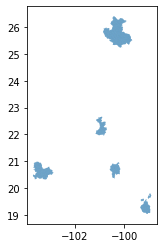

In [3]:
tianguis_prox.plot()

### Population

In [10]:
hex_id = str(tuple(tianguis_prox.hex_id_8.unique()))

schema = 'censo'
table = 'hex_bins_pop_2020'

cve_column = 'hex_id_8'

query = f'SELECT * FROM {schema}.{table} WHERE "{cve_column}" IN {hex_id}'

In [11]:
hex_pop = aup.gdf_from_query(query)
print(hex_pop.shape)
hex_pop.head(2)

(4876, 225)


,geometry,hex_id_8,CVEGEO,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic
0,"POLYGON ((-99.18608 19.47140, -99.18156 19.474...",884995b8c9fffff,09002,13180.984,7002.3184,6178.6660,289.4230,142.02070,147.40231,12891.559,...,3396.892,4234.491,3777.4336,2535.498,1958.4999,1176.6088,63.68923,73.93547,577.7656,15.626393
1,"POLYGON ((-99.15333 19.47646, -99.15369 19.481...",884995b817fffff,09002,11224.782,5932.0500,5292.7334,290.3793,139.58163,150.79770,10822.335,...,2236.987,3080.467,2551.8333,1594.311,1102.6494,662.1067,32.58291,79.75566,665.7047,8.809484


<AxesSubplot:>

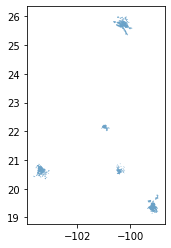

In [12]:
hex_pop.plot()

### Marginalization

In [13]:
schema = 'censo'
table = 'hex_bins_marg_2020'
query = f'SELECT * FROM {schema}.{table} WHERE "{cve_column}" IN {hex_id}'

In [14]:
hex_marg = aup.gdf_from_query(query)
print(hex_marg.shape)
hex_marg.head(2)

(4709, 17)


,geometry,hex_id_8,CVEGEO,pobtot,p6a14nae,sbasc,psdss,ovsde,ovsee,ovsae,ovpt,ovsref,ovsint,ovscel,ovhac,im_2020,imn_2020
0,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",884995b8c1fffff,09002,14474.150,11.159615,39.639160,60.006165,0.094840,0.109755,0.752394,0.921807,8.358856,45.407722,16.135150,54.746320,123.545098,0.965088
1,"POLYGON ((-99.17884 19.50300, -99.17848 19.497...",884995b88dfffff,09002,5324.688,12.022201,22.668638,27.020708,0.101111,0.016225,5.099980,1.091457,5.453633,28.146427,7.906191,28.952435,123.916076,0.967986


In [19]:
hex_marg['Grado_Marg'] = np.nan
hex_marg.loc[hex_marg.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_marg.loc[(hex_marg.imn_2020>=0.946436 )&
             (hex_marg.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_marg.loc[(hex_marg.imn_2020>=0.926536)&
             (hex_marg.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_marg.loc[(hex_marg.imn_2020>=0.8999)&
             (hex_marg.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_marg.loc[hex_marg.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

<AxesSubplot:>

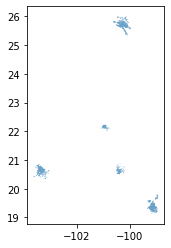

In [15]:
hex_marg.plot()

### Proximity

In [16]:
schema = 'prox_analysis'
table = 'time_15_min_analysis_hexres8'
query = f'SELECT * FROM {schema}.{table} WHERE "{cve_column}" IN {hex_id}'

In [17]:
hex_prox = aup.gdf_from_query(query)
print(hex_prox.shape)
hex_prox.head(2)

(4876, 30)


,hex_id_8,geometry,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,max_asistencia social,...,max_idx_15_min,pobtot,pobfem,pobmas,pob_0a14,pob_15a24,pob_25a59,p_60ymas,dens_pobha,city
0,884995b8c1fffff,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",6.623125,6.623125,4.627151,5.464316,5.596038,4.202571,4.806037,5.596038,...,12.234039,14474.150,7629.7427,6844.4077,2373.83695,2064.68177,7643.225,2392.2773,171.500705,ZMVM
1,884995b81bfffff,"POLYGON ((-99.16726 19.47282, -99.17215 19.475...",14.630789,4.613896,4.614089,14.630789,12.109491,3.710320,12.109491,9.082724,...,22.818648,12379.193,6647.6950,5731.5000,1686.68495,1519.17955,6235.589,2935.5679,146.694621,ZMVM


<AxesSubplot:>

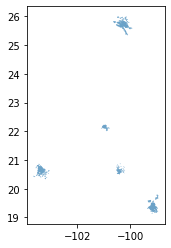

In [18]:
hex_prox.plot()

## Merge data

In [31]:
hex_merge = hex_pop[['hex_id_8','pobtot','graproes','geometry']].merge(tianguis_prox[['hex_id_8','time','metropolis']],
                                                                      on='hex_id_8')
hex_merge = hex_merge.merge(hex_marg[['hex_id_8','imn_2020','Grado_Marg']],
                           on='hex_id_8')

hex_prox_cols = [x for x in list(hex_prox.columns) if 'max' in x]
hex_prox_cols.append('hex_id_8')

hex_merge = hex_merge.merge(hex_prox[hex_prox_cols], on='hex_id_8')

print(hex_merge.shape)
hex_merge.head(2)

(4708, 27)


,hex_id_8,pobtot,graproes,geometry,time,metropolis,imn_2020,Grado_Marg,max_escuelas,max_preescolar,...,max_alimentos,max_personal,max_farmacias,max_hogar,max_complementarios,max_entretenimiento,max_social,max_actividad física,max_cultural,max_idx_15_min
0,884995b8c9fffff,13180.984,12.63588,"POLYGON ((-99.18608 19.47140, -99.18156 19.474...",9.282386,CDMX,0.965490,Bajo,8.795908,4.889084,...,1.161752,1.718883,2.453198,2.064740,1.493968,7.547548,5.973796,7.547548,6.747896,8.795908
1,884995b817fffff,11224.782,11.49281,"POLYGON ((-99.15333 19.47646, -99.15369 19.481...",21.961244,CDMX,0.958849,Bajo,6.468572,4.053411,...,1.628954,2.426790,3.621917,2.592288,2.864861,17.252786,8.521323,7.886402,17.252786,17.252786


## Univariate analysis

Text(0, 0.5, 'Tiempo a tianguis')

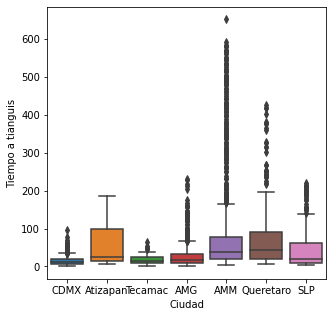

In [33]:
fig, ax = plt.subplots(figsize=(5,5))

sns.boxplot(x=np.array(hex_merge.metropolis) , y=np.array(hex_merge.time), ax=ax)

plt.xlabel('Ciudad')
plt.ylabel('Tiempo a tianguis')

<AxesSubplot:xlabel='metropolis', ylabel='time'>

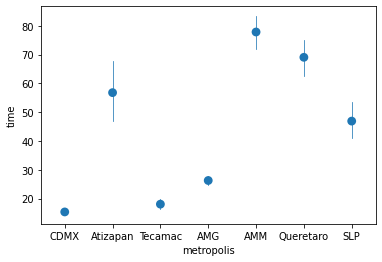

In [47]:
sns.pointplot(data=hex_merge, x="metropolis", y="time", 
              join=False, errorbar='sd',estimator=np.mean, errwidth=0.75)

<AxesSubplot:xlabel='metropolis', ylabel='time'>

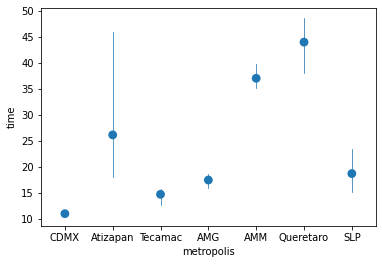

In [78]:
sns.pointplot(data=hex_merge, x="metropolis", y="time", 
              join=False,estimator=np.median, errwidth=0.75)

## Time analysis

In [79]:
def tianguis_time_groups(time_column):
    if time_column <= 5:
        time_group = '0-5min'
    elif time_column <= 15:
        time_group = '5-15min'
    elif time_column <= 30:
        time_group = '15-30min'
    elif time_column <= 45:
        time_group = '30-45min'
    elif time_column <= 60:
        time_group = '45-60min'
    else:
        time_group = '> 60min'
    return time_group

In [80]:
hex_merge['time_group'] = hex_merge.time.apply(tianguis_time_groups)

In [89]:
hex_group = hex_merge.groupby(['metropolis','time_group']).sum()
hex_group = hex_group['pobtot'].copy()
hex_group = hex_group.reset_index()
hex_group['pct_pobtot'] = 100 * hex_group['pobtot'] / hex_group.groupby('metropolis')['pobtot'].transform('sum')

In [90]:
from pandas.api.types import CategoricalDtype

In [91]:
#categorical data
cat_list = ['0-5min','5-15min','15-30min','30-45min', 
            '45-60min','> 60min']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_group['time_group'] = hex_group['time_group'].astype(cat_size_order)
hex_group = hex_group.sort_values('time_group')

In [92]:
hex_group.head(5)

,metropolis,time_group,pobtot,pct_pobtot
0,AMG,0-5min,744530.3407,14.589604
17,CDMX,0-5min,668921.9119,7.288576
34,Tecamac,0-5min,18463.1212,3.458558
6,AMM,0-5min,6718.6973,0.127670
28,SLP,0-5min,66323.1801,5.558869


<AxesSubplot:xlabel='time_group', ylabel='pct_pobtot'>

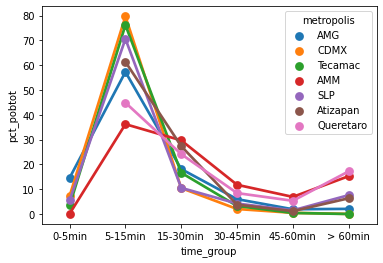

In [97]:
sns.pointplot(data=hex_group, x="time_group", y="pct_pobtot", hue='metropolis')

## Bivariate analysis

### Time vs marginalization

In [99]:
#categorical data
cat_list = ['Muy bajo','Bajo','Medio','Alto', 'Muy alto']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_merge['Grado_Marg'] = hex_merge['Grado_Marg'].astype(cat_size_order)
hex_merge = hex_merge.sort_values('Grado_Marg')

<AxesSubplot:xlabel='Grado_Marg', ylabel='time'>

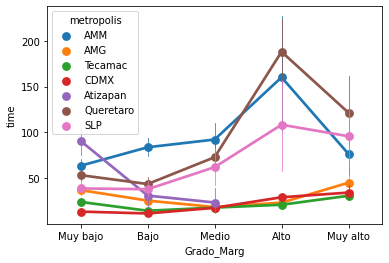

In [101]:
sns.pointplot(data=hex_merge, x="Grado_Marg", y="time", 
              hue='metropolis',errorbar='sd',estimator=np.mean, errwidth=0.75)

<AxesSubplot:xlabel='Grado_Marg', ylabel='time'>

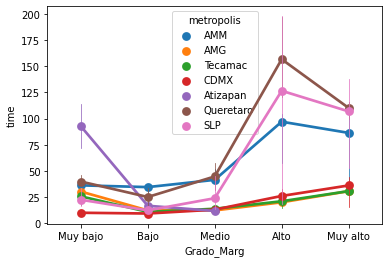

In [102]:
sns.pointplot(data=hex_merge, x="Grado_Marg", y="time", 
              hue='metropolis',errorbar='sd',estimator=np.median, errwidth=0.75)

### Time vs time to food

<AxesSubplot:xlabel='max_alimentos', ylabel='time'>

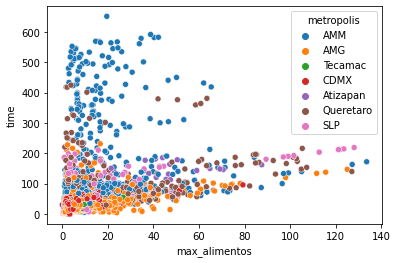

In [106]:
sns.scatterplot(data=hex_merge, x='max_alimentos', y='time',
               hue='metropolis')

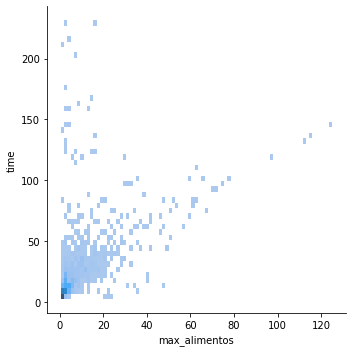

In [109]:
hex_city = hex_merge.loc[hex_merge.metropolis=='AMG']
sns.displot(hex_city, x='max_alimentos', y='time')

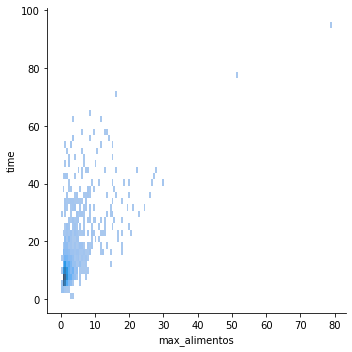

In [110]:
hex_city = hex_merge.loc[hex_merge.metropolis=='CDMX']
sns.displot(hex_city, x='max_alimentos', y='time')

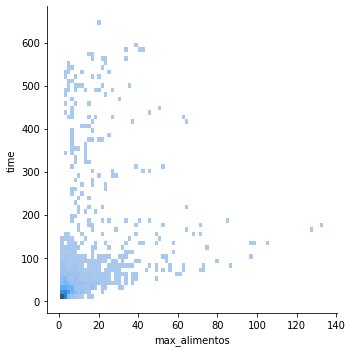

In [111]:
hex_city = hex_merge.loc[hex_merge.metropolis=='AMM']
sns.displot(hex_city, x='max_alimentos', y='time')

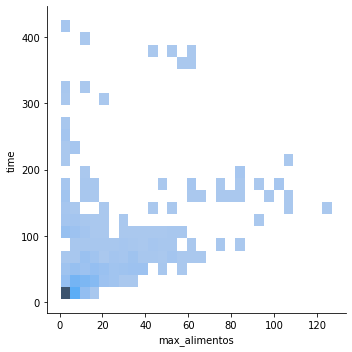

In [112]:
hex_city = hex_merge.loc[hex_merge.metropolis=='Queretaro']
sns.displot(hex_city, x='max_alimentos', y='time')

### Time to tianguis vs general proximity

<AxesSubplot:xlabel='max_idx_15_min', ylabel='time'>

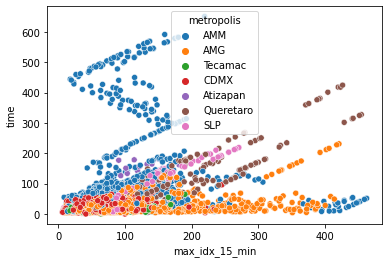

In [114]:
sns.scatterplot(data=hex_merge, x='max_idx_15_min', y='time',
               hue='metropolis')

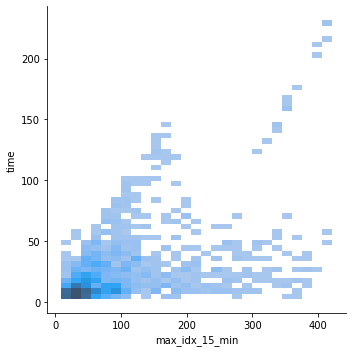

In [115]:
hex_city = hex_merge.loc[hex_merge.metropolis=='AMG']
sns.displot(hex_city, x='max_idx_15_min', y='time')

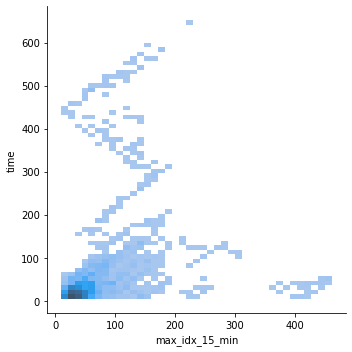

In [116]:
hex_city = hex_merge.loc[hex_merge.metropolis=='AMM']
sns.displot(hex_city, x='max_idx_15_min', y='time')

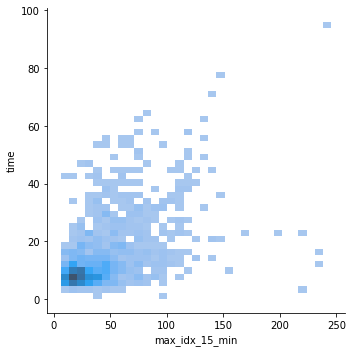

In [117]:
hex_city = hex_merge.loc[hex_merge.metropolis=='CDMX']
sns.displot(hex_city, x='max_idx_15_min', y='time')

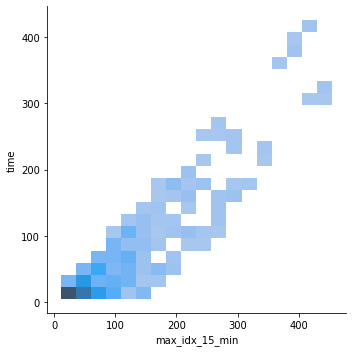

In [118]:
hex_city = hex_merge.loc[hex_merge.metropolis=='Queretaro']
sns.displot(hex_city, x='max_idx_15_min', y='time')